In [1]:
# Credit to https://github.com/dataprofessor/ for methods used here

In [2]:
# ! pip install chembl_webresource_client

In [3]:
# Loading data

In [4]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [5]:
hiv_target = new_client.target
hiv_target_query = hiv_target.search("hiv")
hiv_targets = pd.DataFrame.from_dict(hiv_target_query)
hiv_targets.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Human immunodeficiency virus,HIV protease,19.0,False,CHEMBL3638323,"[{'accession': 'Q9YQ30', 'component_descriptio...",SINGLE PROTEIN,12721
1,[],HIV-1 M:B_Lai,HIV-1 M:B_Lai,15.0,False,CHEMBL612775,[],ORGANISM,290579
2,[],Homo sapiens,Transcription factor HIVEP2,12.0,False,CHEMBL4523214,"[{'accession': 'P31629', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,Ubiquitin thioesterase OTU1,12.0,False,CHEMBL4630833,"[{'accession': 'Q5VVQ6', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'P51681', 'xref_name': None, 'xre...",Homo sapiens,C-C chemokine receptor type 5,11.0,False,CHEMBL274,"[{'accession': 'P51681', 'component_descriptio...",SINGLE PROTEIN,9606


In [6]:
selected_hiv_target = hiv_targets.target_chembl_id[4]
selected_hiv_target

'CHEMBL274'

In [7]:
hiv_activity = new_client.activity

In [8]:
hiv_res = hiv_activity.filter(target_chembl_id=selected_hiv_target).filter(standard_type="IC50")

In [9]:
hiv_df = pd.DataFrame.from_dict(hiv_res)
hiv_df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,75508,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,335.0
1,None,None,75509,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,28.0
2,None,None,75510,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,10.0
3,None,None,76739,[],CHEMBL873385,Binding affinity against human CCR5 receptor s...,B,None,None,BAO_0000190,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,35.0
4,None,None,77749,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,15.0


In [10]:
hiv_df.standard_type.unique(), hiv_df.shape

(array(['IC50'], dtype=object), (3901, 46))

In [11]:
hiv_filter_df = hiv_df[hiv_df.standard_value.notna()]
hiv_filter_df.shape

(2961, 46)

In [12]:
hiv_sub = hiv_filter_df[["molecule_chembl_id", "canonical_smiles", "standard_value"]].copy()
hiv_sub.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.0


In [13]:
bioactivity_class = []
for i in hiv_sub.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")
hiv_sub["bioactivity_class"] = bioactivity_class
hiv_sub.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0,active
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0,active
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0,active
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.0,active
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.0,active


In [14]:
hiv_sub.shape, hiv_sub["molecule_chembl_id"].unique().shape

((2961, 4), (2129,))

In [15]:
hiv_sub = hiv_sub.drop_duplicates(subset="molecule_chembl_id", keep='first')
hiv_sub.shape

(2129, 4)

In [16]:
hiv_sub.to_csv("hiv_filtered_data.csv", index=False)

In [17]:
# Calculating values for Lipinski's rule of five and EDA

In [18]:
# ! pip install rdkit

In [19]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [20]:
hiv_sub = pd.read_csv("hiv_filtered_data.csv")

In [21]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    mol_data= []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem) 
        mol_data.append(mol)
       
    base_data = np.arange(1,1)
    i = 0  
    for mol in mol_data:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])   
    
        if (i==0):
            base_data = row
        else:
            base_data = np.vstack([base_data, row])
            
        i=i+1      
    
    column_names=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=base_data, columns=column_names)
    
    return descriptors

In [22]:
hiv_lipinski = lipinski(hiv_sub["canonical_smiles"])
hiv_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,595.704,5.7114,0.0,9.0
1,518.618,4.6494,0.0,8.0
2,581.717,6.5817,0.0,7.0
3,557.181,5.2894,0.0,4.0
4,567.690,6.4076,0.0,7.0


In [23]:
hiv_combined = pd.concat([hiv_sub, hiv_lipinski], axis=1)
hiv_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0,active,595.704,5.7114,0.0,9.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0,active,518.618,4.6494,0.0,8.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0,active,581.717,6.5817,0.0,7.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.0,active,557.181,5.2894,0.0,4.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.0,active,567.690,6.4076,0.0,7.0


In [24]:
hiv_norm = hiv_combined.copy()
hiv_norm["standard_value_norm"] = [100000000 if i>=100000000 else i for i in hiv_norm["standard_value"]]
hiv_norm["pIC50"] = [-np.log10(i*(10**-9)) for i in hiv_norm["standard_value_norm"]]
hiv_norm.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0,active,595.704,5.7114,0.0,9.0,335.0,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0,active,518.618,4.6494,0.0,8.0,28.0,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0,active,581.717,6.5817,0.0,7.0,10.0,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.0,active,557.181,5.2894,0.0,4.0,35.0,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.0,active,567.690,6.4076,0.0,7.0,15.0,7.823909


In [25]:
hiv_final = hiv_norm.drop(["standard_value", "standard_value_norm"], axis=1)
hiv_final["pIC50"].describe(), hiv_final.shape

(count    2129.000000
 mean        7.276278
 std         1.487839
 min         2.000000
 25%         6.267606
 50%         7.455932
 75%         8.420216
 max        11.522879
 Name: pIC50, dtype: float64,
 (2129, 8))

In [26]:
hiv_2class = hiv_final[hiv_final["bioactivity_class"]!="intermediate"]
hiv_2class.shape

(1919, 8)

In [27]:
hiv_final.to_csv("hiv_final.csv", index=False)

In [28]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

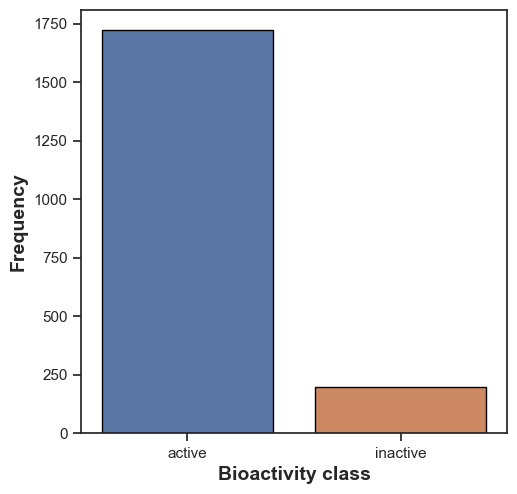

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=hiv_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

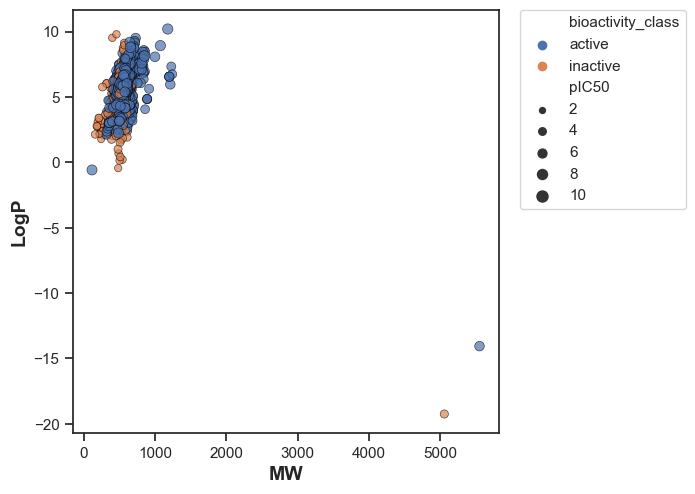

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=hiv_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Text(0, 0.5, 'pIC50 value')

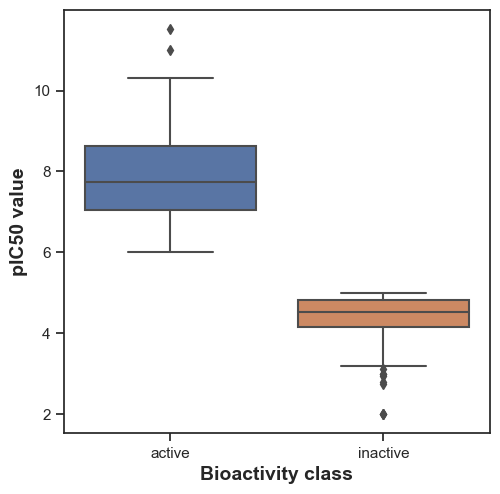

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = hiv_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

In [32]:
def mannwhitney(descriptor, verbose=False):
    # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from scipy.stats import mannwhitneyu

    # actives 
    df = hiv_2class[[descriptor, "bioactivity_class"]]
    active = df[df.bioactivity_class == "active"][descriptor]

    # inactives
    df = hiv_2class[[descriptor, "bioactivity_class"]]
    inactive = df[df.bioactivity_class == "inactive"][descriptor]

    # compare samples
    stat, p = mannwhitneyu(active, inactive)

    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
  
    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
    return results

In [33]:
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,337708.0,8.951761e-117,0.05,Different distribution (reject H0)


Text(0, 0.5, 'MW')

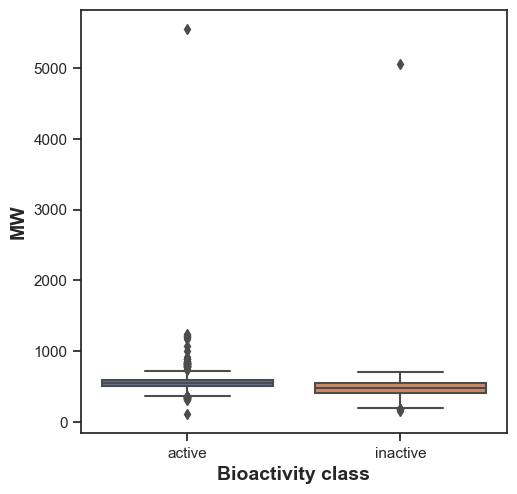

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = hiv_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

In [35]:
mannwhitney("MW")

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,241663.5,3.959639e-23,0.05,Different distribution (reject H0)


Text(0, 0.5, 'LogP')

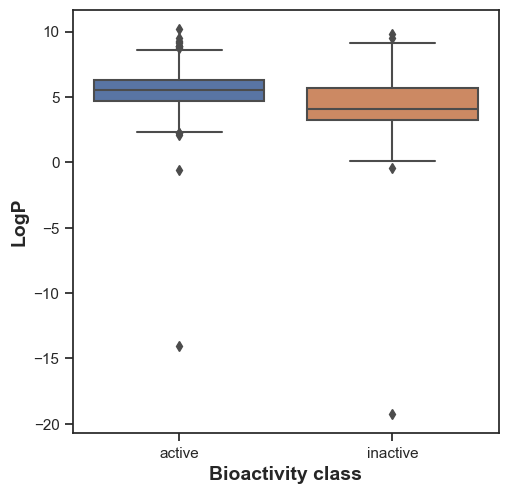

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = hiv_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

In [37]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,239563.5,6.627096e-22,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHDonors')

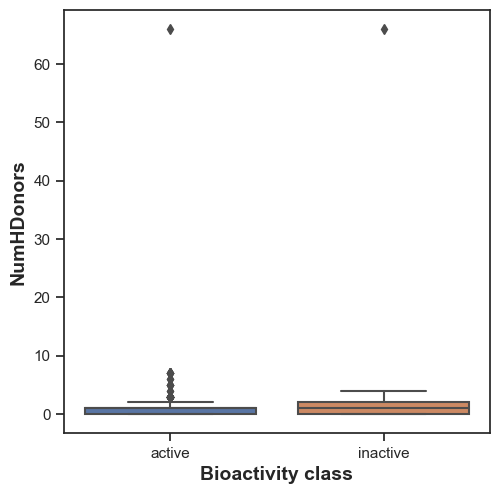

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = hiv_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

In [39]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,124867.0,6.874896e-11,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHAcceptors')

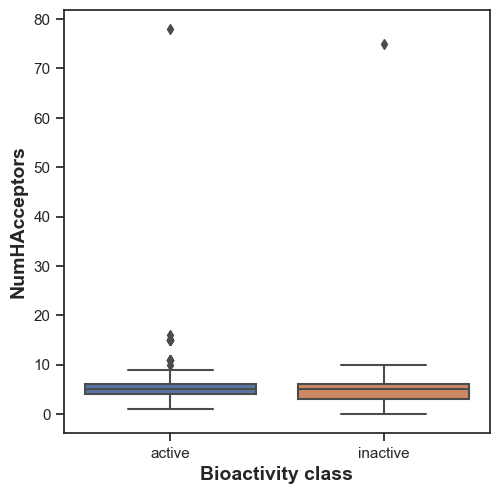

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = hiv_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

In [41]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,186511.5,0.013925,0.05,Different distribution (reject H0)


pIC50 values:

Taking a look at pIC50 values, the actives and inactives displayed **statistically significant difference**, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors:

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), all descriptors showed **statistically significant difference** between actives and inactives.

In [42]:
# Calculating PaDEL descriptors

In [43]:
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [44]:
# ! unzip padel.zip

In [45]:
hiv_bioac = pd.read_csv("hiv_final.csv")
hiv_bioac.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.704,5.7114,0.0,9.0,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,518.618,4.6494,0.0,8.0,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.5817,0.0,7.0,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,active,557.181,5.2894,0.0,4.0,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,567.690,6.4076,0.0,7.0,7.823909


In [46]:
hiv_bioac_sub = hiv_bioac[["canonical_smiles", "molecule_chembl_id"]]
hiv_bioac_sub.to_csv('hiv_molecule.smi', sep='\t', index=False, header=False)

In [47]:
! cat hiv_molecule.smi | head -3

C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2nnnc2-c2ccccc2)c2ccccc2)CC1	CHEMBL105460
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2cncn2)c2ccccc2)CC1	CHEMBL105606
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(C)(Cn2cnc3ccccc32)c2ccccc2)CC1	CHEMBL105570
cat: stdout: Broken pipe


In [48]:
! cat hiv_molecule.smi | wc -l

    2129


In [49]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [50]:
! bash padel.sh

Processing CHEMBL105460 in hiv_molecule.smi (1/2129). 
Processing CHEMBL105606 in hiv_molecule.smi (2/2129). 
Processing CHEMBL105570 in hiv_molecule.smi (3/2129). 
Processing CHEMBL83338 in hiv_molecule.smi (4/2129). 
Processing CHEMBL325357 in hiv_molecule.smi (5/2129). 
Processing CHEMBL105572 in hiv_molecule.smi (6/2129). 
Processing CHEMBL107750 in hiv_molecule.smi (7/2129). 
Processing CHEMBL105659 in hiv_molecule.smi (8/2129). 
Processing CHEMBL107380 in hiv_molecule.smi (9/2129). Average speed: 3.95 s/mol.
Processing CHEMBL104793 in hiv_molecule.smi (10/2129). Average speed: 2.02 s/mol.
Processing CHEMBL106231 in hiv_molecule.smi (11/2129). Average speed: 1.36 s/mol.
Processing CHEMBL321539 in hiv_molecule.smi (12/2129). Average speed: 1.13 s/mol.
Processing CHEMBL322439 in hiv_molecule.smi (13/2129). Average speed: 1.13 s/mol.
Processing CHEMBL104474 in hiv_molecule.smi (14/2129). Average speed: 1.13 s/mol.
Processing CHEMBL319622 in hiv_molecule.smi (15/2129). Average speed: 

Processing CHEMBL84351 in hiv_molecule.smi (105/2129). Average speed: 0.18 s/mol.
Processing CHEMBL83773 in hiv_molecule.smi (106/2129). Average speed: 0.18 s/mol.
Processing CHEMBL173095 in hiv_molecule.smi (107/2129). Average speed: 0.18 s/mol.
Processing CHEMBL310645 in hiv_molecule.smi (108/2129). Average speed: 0.18 s/mol.
Processing CHEMBL82168 in hiv_molecule.smi (109/2129). Average speed: 0.18 s/mol.
Processing CHEMBL310106 in hiv_molecule.smi (110/2129). Average speed: 0.18 s/mol.
Processing CHEMBL79907 in hiv_molecule.smi (111/2129). Average speed: 0.18 s/mol.
Processing CHEMBL432182 in hiv_molecule.smi (112/2129). Average speed: 0.18 s/mol.
Processing CHEMBL309922 in hiv_molecule.smi (113/2129). Average speed: 0.18 s/mol.
Processing CHEMBL79315 in hiv_molecule.smi (114/2129). Average speed: 0.18 s/mol.
Processing CHEMBL79530 in hiv_molecule.smi (115/2129). Average speed: 0.18 s/mol.
Processing CHEMBL83113 in hiv_molecule.smi (116/2129). Average speed: 0.18 s/mol.
Processing 

Processing CHEMBL174283 in hiv_molecule.smi (206/2129). Average speed: 0.16 s/mol.
Processing CHEMBL173609 in hiv_molecule.smi (208/2129). Average speed: 0.16 s/mol.
Processing CHEMBL368265 in hiv_molecule.smi (207/2129). Average speed: 0.16 s/mol.
Processing CHEMBL367863 in hiv_molecule.smi (209/2129). Average speed: 0.15 s/mol.
Processing CHEMBL173262 in hiv_molecule.smi (210/2129). Average speed: 0.16 s/mol.
Processing CHEMBL355749 in hiv_molecule.smi (211/2129). Average speed: 0.16 s/mol.
Processing CHEMBL368517 in hiv_molecule.smi (212/2129). Average speed: 0.16 s/mol.
Processing CHEMBL367421 in hiv_molecule.smi (213/2129). Average speed: 0.16 s/mol.
Processing CHEMBL369189 in hiv_molecule.smi (214/2129). Average speed: 0.16 s/mol.
Processing CHEMBL367446 in hiv_molecule.smi (215/2129). Average speed: 0.16 s/mol.
Processing CHEMBL172944 in hiv_molecule.smi (216/2129). Average speed: 0.15 s/mol.
Processing CHEMBL367787 in hiv_molecule.smi (217/2129). Average speed: 0.15 s/mol.
Proc

Processing CHEMBL33335 in hiv_molecule.smi (305/2129). Average speed: 0.15 s/mol.
Processing CHEMBL408438 in hiv_molecule.smi (307/2129). Average speed: 0.15 s/mol.
Processing CHEMBL431111 in hiv_molecule.smi (306/2129). Average speed: 0.15 s/mol.
Processing CHEMBL284487 in hiv_molecule.smi (308/2129). Average speed: 0.15 s/mol.
Processing CHEMBL287515 in hiv_molecule.smi (309/2129). Average speed: 0.15 s/mol.
Processing CHEMBL284380 in hiv_molecule.smi (310/2129). Average speed: 0.15 s/mol.
Processing CHEMBL33330 in hiv_molecule.smi (311/2129). Average speed: 0.15 s/mol.
Processing CHEMBL103813 in hiv_molecule.smi (312/2129). Average speed: 0.15 s/mol.
Processing CHEMBL319689 in hiv_molecule.smi (313/2129). Average speed: 0.15 s/mol.
Processing CHEMBL320149 in hiv_molecule.smi (314/2129). Average speed: 0.15 s/mol.
Processing CHEMBL102674 in hiv_molecule.smi (315/2129). Average speed: 0.15 s/mol.
Processing CHEMBL99909 in hiv_molecule.smi (316/2129). Average speed: 0.15 s/mol.
Process

Processing CHEMBL366770 in hiv_molecule.smi (405/2129). Average speed: 0.15 s/mol.
Processing CHEMBL283788 in hiv_molecule.smi (406/2129). Average speed: 0.15 s/mol.
Processing CHEMBL367461 in hiv_molecule.smi (407/2129). Average speed: 0.15 s/mol.
Processing CHEMBL176459 in hiv_molecule.smi (408/2129). Average speed: 0.15 s/mol.
Processing CHEMBL263529 in hiv_molecule.smi (409/2129). Average speed: 0.15 s/mol.
Processing CHEMBL172436 in hiv_molecule.smi (410/2129). Average speed: 0.15 s/mol.
Processing CHEMBL367246 in hiv_molecule.smi (411/2129). Average speed: 0.15 s/mol.
Processing CHEMBL367697 in hiv_molecule.smi (412/2129). Average speed: 0.15 s/mol.
Processing CHEMBL176337 in hiv_molecule.smi (413/2129). Average speed: 0.15 s/mol.
Processing CHEMBL369812 in hiv_molecule.smi (414/2129). Average speed: 0.15 s/mol.
Processing CHEMBL367987 in hiv_molecule.smi (415/2129). Average speed: 0.15 s/mol.
Processing CHEMBL177205 in hiv_molecule.smi (416/2129). Average speed: 0.15 s/mol.
Proc

Processing CHEMBL262663 in hiv_molecule.smi (504/2129). Average speed: 0.15 s/mol.
Processing CHEMBL175341 in hiv_molecule.smi (505/2129). Average speed: 0.15 s/mol.
Processing CHEMBL293882 in hiv_molecule.smi (506/2129). Average speed: 0.15 s/mol.
Processing CHEMBL65649 in hiv_molecule.smi (507/2129). Average speed: 0.15 s/mol.
Processing CHEMBL303964 in hiv_molecule.smi (508/2129). Average speed: 0.15 s/mol.
Processing CHEMBL62611 in hiv_molecule.smi (509/2129). Average speed: 0.15 s/mol.
Processing CHEMBL294788 in hiv_molecule.smi (510/2129). Average speed: 0.15 s/mol.
Processing CHEMBL62180 in hiv_molecule.smi (511/2129). Average speed: 0.15 s/mol.
Processing CHEMBL62549 in hiv_molecule.smi (512/2129). Average speed: 0.15 s/mol.
Processing CHEMBL62598 in hiv_molecule.smi (513/2129). Average speed: 0.15 s/mol.
Processing CHEMBL292345 in hiv_molecule.smi (515/2129). Average speed: 0.15 s/mol.
Processing CHEMBL62454 in hiv_molecule.smi (514/2129). Average speed: 0.15 s/mol.
Processing

Processing CHEMBL423427 in hiv_molecule.smi (604/2129). Average speed: 0.15 s/mol.
Processing CHEMBL158438 in hiv_molecule.smi (605/2129). Average speed: 0.15 s/mol.
Processing CHEMBL435259 in hiv_molecule.smi (607/2129). Average speed: 0.15 s/mol.
Processing CHEMBL161594 in hiv_molecule.smi (606/2129). Average speed: 0.15 s/mol.
Processing CHEMBL432010 in hiv_molecule.smi (608/2129). Average speed: 0.15 s/mol.
Processing CHEMBL330252 in hiv_molecule.smi (609/2129). Average speed: 0.15 s/mol.
Processing CHEMBL90927 in hiv_molecule.smi (610/2129). Average speed: 0.15 s/mol.
Processing CHEMBL326111 in hiv_molecule.smi (611/2129). Average speed: 0.15 s/mol.
Processing CHEMBL89715 in hiv_molecule.smi (612/2129). Average speed: 0.15 s/mol.
Processing CHEMBL327880 in hiv_molecule.smi (613/2129). Average speed: 0.15 s/mol.
Processing CHEMBL328339 in hiv_molecule.smi (614/2129). Average speed: 0.15 s/mol.
Processing CHEMBL418954 in hiv_molecule.smi (615/2129). Average speed: 0.15 s/mol.
Proces

Processing CHEMBL182074 in hiv_molecule.smi (704/2129). Average speed: 0.15 s/mol.
Processing CHEMBL182929 in hiv_molecule.smi (705/2129). Average speed: 0.15 s/mol.
Processing CHEMBL182083 in hiv_molecule.smi (706/2129). Average speed: 0.15 s/mol.
Processing CHEMBL180155 in hiv_molecule.smi (707/2129). Average speed: 0.15 s/mol.
Processing CHEMBL426960 in hiv_molecule.smi (708/2129). Average speed: 0.15 s/mol.
Processing CHEMBL361444 in hiv_molecule.smi (709/2129). Average speed: 0.15 s/mol.
Processing CHEMBL425168 in hiv_molecule.smi (710/2129). Average speed: 0.15 s/mol.
Processing CHEMBL183710 in hiv_molecule.smi (711/2129). Average speed: 0.15 s/mol.
Processing CHEMBL183492 in hiv_molecule.smi (712/2129). Average speed: 0.15 s/mol.
Processing CHEMBL181967 in hiv_molecule.smi (713/2129). Average speed: 0.15 s/mol.
Processing CHEMBL178477 in hiv_molecule.smi (714/2129). Average speed: 0.15 s/mol.
Processing CHEMBL180184 in hiv_molecule.smi (717/2129). Average speed: 0.15 s/mol.
Proc

Processing CHEMBL3085307 in hiv_molecule.smi (803/2129). Average speed: 0.14 s/mol.
Processing CHEMBL204821 in hiv_molecule.smi (804/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3085305 in hiv_molecule.smi (805/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3085312 in hiv_molecule.smi (806/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3085311 in hiv_molecule.smi (807/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3085313 in hiv_molecule.smi (808/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3085309 in hiv_molecule.smi (809/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3085308 in hiv_molecule.smi (810/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3085310 in hiv_molecule.smi (811/2129). Average speed: 0.14 s/mol.
Processing CHEMBL2105686 in hiv_molecule.smi (812/2129). Average speed: 0.14 s/mol.
Processing CHEMBL207487 in hiv_molecule.smi (813/2129). Average speed: 0.15 s/mol.
Processing CHEMBL207004 in hiv_molecule.smi (814/2129). Average speed: 0.14 s/

Processing CHEMBL234208 in hiv_molecule.smi (902/2129). Average speed: 0.14 s/mol.
Processing CHEMBL233845 in hiv_molecule.smi (903/2129). Average speed: 0.14 s/mol.
Processing CHEMBL233846 in hiv_molecule.smi (904/2129). Average speed: 0.14 s/mol.
Processing CHEMBL391886 in hiv_molecule.smi (906/2129). Average speed: 0.14 s/mol.
Processing CHEMBL393002 in hiv_molecule.smi (905/2129). Average speed: 0.14 s/mol.
Processing CHEMBL237896 in hiv_molecule.smi (907/2129). Average speed: 0.14 s/mol.
Processing CHEMBL234896 in hiv_molecule.smi (908/2129). Average speed: 0.14 s/mol.
Processing CHEMBL234894 in hiv_molecule.smi (909/2129). Average speed: 0.14 s/mol.
Processing CHEMBL234676 in hiv_molecule.smi (911/2129). Average speed: 0.14 s/mol.
Processing CHEMBL393004 in hiv_molecule.smi (910/2129). Average speed: 0.14 s/mol.
Processing CHEMBL232412 in hiv_molecule.smi (912/2129). Average speed: 0.14 s/mol.
Processing CHEMBL232409 in hiv_molecule.smi (913/2129). Average speed: 0.14 s/mol.
Proc

Processing CHEMBL257728 in hiv_molecule.smi (1001/2129). Average speed: 0.14 s/mol.
Processing CHEMBL405634 in hiv_molecule.smi (1002/2129). Average speed: 0.14 s/mol.
Processing CHEMBL272581 in hiv_molecule.smi (1003/2129). Average speed: 0.14 s/mol.
Processing CHEMBL272490 in hiv_molecule.smi (1004/2129). Average speed: 0.14 s/mol.
Processing CHEMBL402776 in hiv_molecule.smi (1005/2129). Average speed: 0.14 s/mol.
Processing CHEMBL411640 in hiv_molecule.smi (1006/2129). Average speed: 0.14 s/mol.
Processing CHEMBL272556 in hiv_molecule.smi (1007/2129). Average speed: 0.14 s/mol.
Processing CHEMBL256584 in hiv_molecule.smi (1008/2129). Average speed: 0.14 s/mol.
Processing CHEMBL256792 in hiv_molecule.smi (1009/2129). Average speed: 0.14 s/mol.
Processing CHEMBL515097 in hiv_molecule.smi (1011/2129). Average speed: 0.14 s/mol.
Processing CHEMBL257000 in hiv_molecule.smi (1010/2129). Average speed: 0.14 s/mol.
Processing CHEMBL505595 in hiv_molecule.smi (1012/2129). Average speed: 0.14

Processing CHEMBL3084496 in hiv_molecule.smi (1099/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3084492 in hiv_molecule.smi (1100/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3084495 in hiv_molecule.smi (1101/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3084494 in hiv_molecule.smi (1102/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3084493 in hiv_molecule.smi (1103/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3084491 in hiv_molecule.smi (1104/2129). Average speed: 0.14 s/mol.
Processing CHEMBL492292 in hiv_molecule.smi (1105/2129). Average speed: 0.14 s/mol.
Processing CHEMBL505556 in hiv_molecule.smi (1106/2129). Average speed: 0.14 s/mol.
Processing CHEMBL524159 in hiv_molecule.smi (1107/2129). Average speed: 0.14 s/mol.
Processing CHEMBL492897 in hiv_molecule.smi (1108/2129). Average speed: 0.14 s/mol.
Processing CHEMBL492854 in hiv_molecule.smi (1109/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3084490 in hiv_molecule.smi (1110/2129). Average spee

Processing CHEMBL459378 in hiv_molecule.smi (1197/2129). Average speed: 0.14 s/mol.
Processing CHEMBL469542 in hiv_molecule.smi (1198/2129). Average speed: 0.14 s/mol.
Processing CHEMBL460630 in hiv_molecule.smi (1199/2129). Average speed: 0.14 s/mol.
Processing CHEMBL518326 in hiv_molecule.smi (1200/2129). Average speed: 0.14 s/mol.
Processing CHEMBL460008 in hiv_molecule.smi (1201/2129). Average speed: 0.14 s/mol.
Processing CHEMBL459600 in hiv_molecule.smi (1202/2129). Average speed: 0.14 s/mol.
Processing CHEMBL459598 in hiv_molecule.smi (1204/2129). Average speed: 0.14 s/mol.
Processing CHEMBL460217 in hiv_molecule.smi (1203/2129). Average speed: 0.14 s/mol.
Processing CHEMBL516939 in hiv_molecule.smi (1205/2129). Average speed: 0.14 s/mol.
Processing CHEMBL460009 in hiv_molecule.smi (1206/2129). Average speed: 0.14 s/mol.
Processing CHEMBL461688 in hiv_molecule.smi (1207/2129). Average speed: 0.14 s/mol.
Processing CHEMBL456425 in hiv_molecule.smi (1208/2129). Average speed: 0.14

Processing CHEMBL3084729 in hiv_molecule.smi (1294/2129). Average speed: 0.14 s/mol.
Processing CHEMBL3084731 in hiv_molecule.smi (1295/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1093137 in hiv_molecule.smi (1296/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1098665 in hiv_molecule.smi (1298/2129). Average speed: 0.14 s/mol.
Processing CHEMBL518924 in hiv_molecule.smi (1297/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1098664 in hiv_molecule.smi (1299/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1094518 in hiv_molecule.smi (1300/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1095191 in hiv_molecule.smi (1301/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1098357 in hiv_molecule.smi (1302/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1095816 in hiv_molecule.smi (1303/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1095815 in hiv_molecule.smi (1304/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1098014 in hiv_molecule.smi (1305/2129). Average 

Processing CHEMBL1171096 in hiv_molecule.smi (1392/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1171289 in hiv_molecule.smi (1393/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1171290 in hiv_molecule.smi (1394/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1171291 in hiv_molecule.smi (1395/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1170694 in hiv_molecule.smi (1396/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1171103 in hiv_molecule.smi (1397/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1173204 in hiv_molecule.smi (1398/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1170660 in hiv_molecule.smi (1399/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1170661 in hiv_molecule.smi (1400/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1173642 in hiv_molecule.smi (1401/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1173708 in hiv_molecule.smi (1403/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1173707 in hiv_molecule.smi (1402/2129). Average

Processing CHEMBL1649928 in hiv_molecule.smi (1489/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649926 in hiv_molecule.smi (1490/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649927 in hiv_molecule.smi (1491/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649925 in hiv_molecule.smi (1493/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649924 in hiv_molecule.smi (1492/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649923 in hiv_molecule.smi (1494/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649921 in hiv_molecule.smi (1495/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649920 in hiv_molecule.smi (1497/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649922 in hiv_molecule.smi (1496/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649917 in hiv_molecule.smi (1499/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649919 in hiv_molecule.smi (1498/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1649918 in hiv_molecule.smi (1500/2129). Average

Processing CHEMBL1784394 in hiv_molecule.smi (1586/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784395 in hiv_molecule.smi (1587/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784396 in hiv_molecule.smi (1588/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784397 in hiv_molecule.smi (1589/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784398 in hiv_molecule.smi (1590/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784399 in hiv_molecule.smi (1591/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784400 in hiv_molecule.smi (1592/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784401 in hiv_molecule.smi (1593/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784402 in hiv_molecule.smi (1594/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784403 in hiv_molecule.smi (1595/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784404 in hiv_molecule.smi (1596/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1784478 in hiv_molecule.smi (1597/2129). Average

Processing CHEMBL1944778 in hiv_molecule.smi (1683/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951909 in hiv_molecule.smi (1684/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951906 in hiv_molecule.smi (1685/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951908 in hiv_molecule.smi (1686/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951898 in hiv_molecule.smi (1687/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951899 in hiv_molecule.smi (1688/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951892 in hiv_molecule.smi (1689/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951893 in hiv_molecule.smi (1690/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951894 in hiv_molecule.smi (1691/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951895 in hiv_molecule.smi (1692/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951896 in hiv_molecule.smi (1693/2129). Average speed: 0.14 s/mol.
Processing CHEMBL1951900 in hiv_molecule.smi (1695/2129). Average

Processing CHEMBL2203619 in hiv_molecule.smi (1780/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2203618 in hiv_molecule.smi (1781/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2203617 in hiv_molecule.smi (1782/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2203616 in hiv_molecule.smi (1783/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2203615 in hiv_molecule.smi (1784/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2259885 in hiv_molecule.smi (1786/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2203614 in hiv_molecule.smi (1785/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2259883 in hiv_molecule.smi (1788/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2259884 in hiv_molecule.smi (1787/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2259882 in hiv_molecule.smi (1789/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2259881 in hiv_molecule.smi (1790/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2263647 in hiv_molecule.smi (1791/2129). Average

Processing CHEMBL2435848 in hiv_molecule.smi (1877/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435905 in hiv_molecule.smi (1878/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435912 in hiv_molecule.smi (1879/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435855 in hiv_molecule.smi (1880/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435843 in hiv_molecule.smi (1882/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435852 in hiv_molecule.smi (1881/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435851 in hiv_molecule.smi (1883/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435858 in hiv_molecule.smi (1884/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435854 in hiv_molecule.smi (1885/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435907 in hiv_molecule.smi (1886/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435845 in hiv_molecule.smi (1887/2129). Average speed: 0.13 s/mol.
Processing CHEMBL2435844 in hiv_molecule.smi (1888/2129). Average

Processing CHEMBL3397995 in hiv_molecule.smi (1974/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397994 in hiv_molecule.smi (1975/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397993 in hiv_molecule.smi (1976/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397991 in hiv_molecule.smi (1978/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397992 in hiv_molecule.smi (1977/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397990 in hiv_molecule.smi (1979/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397989 in hiv_molecule.smi (1980/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397988 in hiv_molecule.smi (1981/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397986 in hiv_molecule.smi (1983/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397987 in hiv_molecule.smi (1982/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397985 in hiv_molecule.smi (1984/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3397984 in hiv_molecule.smi (1985/2129). Average

Processing CHEMBL4516788 in hiv_molecule.smi (2071/2129). Average speed: 0.13 s/mol.
Processing CHEMBL4544504 in hiv_molecule.smi (2072/2129). Average speed: 0.13 s/mol.
Processing CHEMBL4519152 in hiv_molecule.smi (2073/2129). Average speed: 0.13 s/mol.
Processing CHEMBL3233178 in hiv_molecule.smi (2074/2129). Average speed: 0.13 s/mol.
Processing CHEMBL4463290 in hiv_molecule.smi (2075/2129). Average speed: 0.13 s/mol.
Processing CHEMBL4465351 in hiv_molecule.smi (2076/2129). Average speed: 0.13 s/mol.
Processing CHEMBL4470701 in hiv_molecule.smi (2077/2129). Average speed: 0.13 s/mol.
Processing CHEMBL4457723 in hiv_molecule.smi (2078/2129). Average speed: 0.13 s/mol.
Processing CHEMBL4442783 in hiv_molecule.smi (2079/2129). Average speed: 0.13 s/mol.
Processing CHEMBL4741305 in hiv_molecule.smi (2080/2129). Average speed: 0.13 s/mol.
Processing CHEMBL4742683 in hiv_molecule.smi (2081/2129). Average speed: 0.13 s/mol.
Processing CHEMBL4760098 in hiv_molecule.smi (2082/2129). Average

In [190]:
hiv_X = pd.read_csv('descriptors_output.csv').drop(columns=['Name'])
hiv_X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [191]:
hiv_Y = hiv_bioac['pIC50']
hiv_Y.head()

0    6.474955
1    7.552842
2    8.000000
3    7.455932
4    7.823909
Name: pIC50, dtype: float64

In [192]:
hiv_dataset = pd.concat([hiv_X, hiv_Y], axis=1)
hiv_dataset.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.474955
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.552842
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.455932
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.823909


In [193]:
hiv_dataset.to_csv("hiv_dataset.csv")

In [194]:
# Creating initial models

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [196]:
hiv_X.shape

(2129, 881)

In [197]:
hiv_Y.shape

(2129,)

In [198]:
X_train, X_test, Y_train, Y_test = train_test_split(hiv_X, hiv_Y, test_size=0.2, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1703, 881), (1703,), (426, 881), (426,))

In [199]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5011523136950742

In [200]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

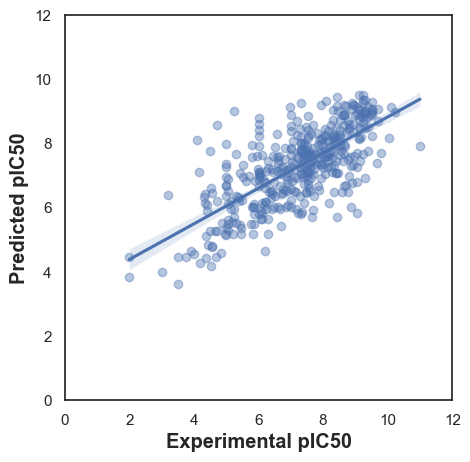

In [201]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [202]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))    
X = selection.fit_transform(hiv_X)
Y = hiv_Y
X.shape, hiv_X.shape

((2129, 154), (2129, 881))

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [204]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.4717090652113798

In [205]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

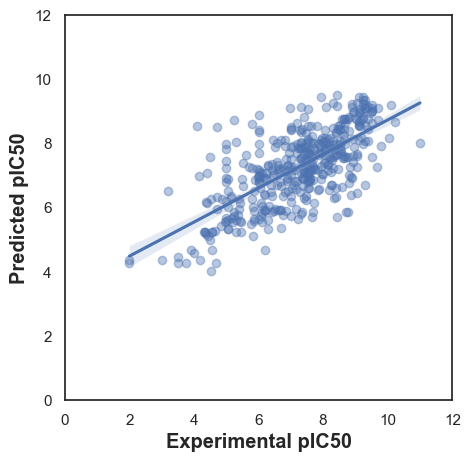

In [206]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [207]:
hiv_final['bioactivity_class'].unique()

array(['active', 'intermediate', 'inactive'], dtype=object)

In [208]:
X = selection.fit_transform(hiv_X)
Y = hiv_final['bioactivity_class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [210]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.823943661971831

In [211]:
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.823943661971831

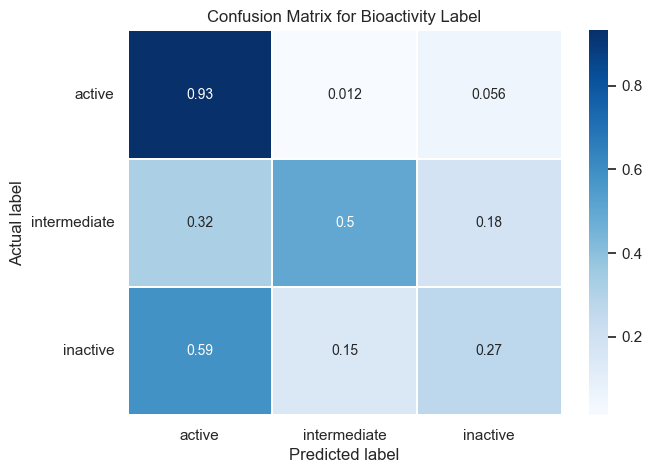

In [212]:
matrix = confusion_matrix(Y_test, Y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(7,5))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

class_names = ['active', 'intermediate', 'inactive']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for Bioactivity Label')
plt.show()

In [213]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      active       0.89      0.93      0.91       341
    inactive       0.69      0.50      0.58        44
intermediate       0.29      0.27      0.28        41

    accuracy                           0.82       426
   macro avg       0.62      0.57      0.59       426
weighted avg       0.81      0.82      0.82       426



In [214]:
X = selection.fit_transform(hiv_X)
Y = hiv_final['bioactivity_class'].replace({'inactive':'non-active', 'intermediate':'non-active'})
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [215]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8615023474178404

In [216]:
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8615023474178404

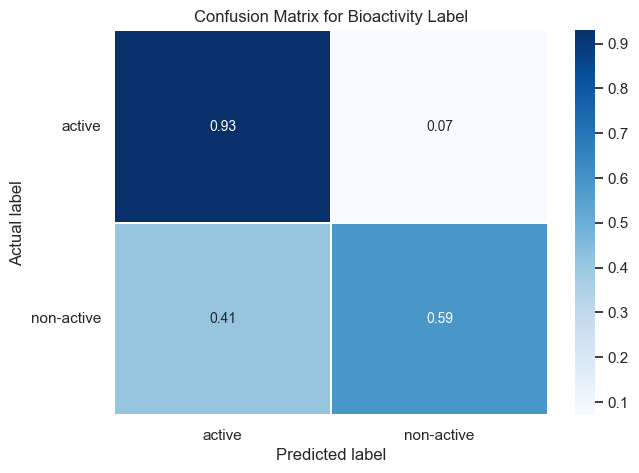

In [217]:
matrix = confusion_matrix(Y_test, Y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(7,5))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

class_names = ['active', 'non-active']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for Bioactivity Label')
plt.show()

In [218]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      active       0.90      0.93      0.91       341
  non-active       0.68      0.59      0.63        85

    accuracy                           0.86       426
   macro avg       0.79      0.76      0.77       426
weighted avg       0.86      0.86      0.86       426



In [ ]:
# Hyperparameter tuning using GridSearch

In [226]:
from sklearn.model_selection import GridSearchCV

In [233]:
hyperparameters = {
    'max_depth': np.arange(10, 80, 20),
    'n_estimators': np.arange(100, 200, 10)
}

In [234]:
grids = GridSearchCV(model, param_grid = hyperparameters, return_train_score = True)
grids.fit(X_train, Y_train)
grids.best_params_

{'max_depth': 10, 'n_estimators': 140}